In [1]:
import pandas as pd
import random

# Defining 5 fraud/AML cases
case_alerts_data = [
    {"Case ID": "C001", "Alert Type": "Large Transactions", "Risk Score": 85, "Status": "Open", "Case Created Date": "2025-02-01"},
    {"Case ID": "C002", "Alert Type": "Rapid Movement of Funds", "Risk Score": 92, "Status": "Under Review", "Case Created Date": "2025-02-03"},
    {"Case ID": "C003", "Alert Type": "Pattern in Funds Transfers", "Risk Score": 78, "Status": "Closed", "Case Created Date": "2025-02-05"},
    {"Case ID": "C004", "Alert Type": "Round Dollar Values", "Risk Score": 81, "Status": "Open", "Case Created Date": "2025-02-07"},
    {"Case ID": "C005", "Alert Type": "Large Transactions", "Risk Score": 88, "Status": "Under Review", "Case Created Date": "2025-02-10"},
]

# Converting to DataFrame
case_alerts_df = pd.DataFrame(case_alerts_data)

# Generating transactions dataset
transactions_data = []
for case in case_alerts_data:
    num_transactions = random.randint(1, 20)  # 1-20 transactions per case
    case_id = case["Case ID"]
    for i in range(num_transactions):
        transactions_data.append({
            "Transaction ID": f"T{random.randint(1000, 9999)}",
            "Case ID": case_id,
            "Amount": round(random.uniform(1000, 50000), 2),  # Random transaction amount
            "Transaction Date": f"2025-02-{random.randint(1, 15)}",
            "Account Number": f"ACC{random.randint(10000, 99999)}"
        })

# Converting to DataFrame
transactions_df = pd.DataFrame(transactions_data)

# Displayin the first few rows
print(case_alerts_df)
print(transactions_df.head())

  Case ID                  Alert Type  Risk Score        Status  \
0    C001          Large Transactions          85          Open   
1    C002     Rapid Movement of Funds          92  Under Review   
2    C003  Pattern in Funds Transfers          78        Closed   
3    C004         Round Dollar Values          81          Open   
4    C005          Large Transactions          88  Under Review   

  Case Created Date  
0        2025-02-01  
1        2025-02-03  
2        2025-02-05  
3        2025-02-07  
4        2025-02-10  
  Transaction ID Case ID    Amount Transaction Date Account Number
0          T6027    C001  16918.74       2025-02-12       ACC99401
1          T5410    C001  48219.26        2025-02-6       ACC63683
2          T4139    C002  37850.81       2025-02-10       ACC71948
3          T6555    C002  18990.89        2025-02-6       ACC45415
4          T6579    C002   9339.37        2025-02-1       ACC56673


In [2]:
# Save the case_alerts DataFrame to a CSV file
case_alerts_df.to_csv('case_alerts.csv', index=False)

# Save the transactions DataFrame to a CSV file
transactions_df.to_csv('transactions.csv', index=False)

In [3]:
print(case_alerts_df.dtypes)
print(transactions_df.dtypes)

Case ID              object
Alert Type           object
Risk Score            int64
Status               object
Case Created Date    object
dtype: object
Transaction ID       object
Case ID              object
Amount              float64
Transaction Date     object
Account Number       object
dtype: object


In [4]:
print(case_alerts_df.isnull().sum())
print(transactions_df.isnull().sum())

Case ID              0
Alert Type           0
Risk Score           0
Status               0
Case Created Date    0
dtype: int64
Transaction ID      0
Case ID             0
Amount              0
Transaction Date    0
Account Number      0
dtype: int64


In [5]:
print("Duplicate Transaction IDs:", transactions_df["Transaction ID"].duplicated().sum())
print("Missing Case IDs in transactions:", transactions_df[~transactions_df["Case ID"].isin(case_alerts_df["Case ID"])].shape[0])

Duplicate Transaction IDs: 1
Missing Case IDs in transactions: 0


In [6]:
total_amounts = transactions_df.groupby("Case ID")["Amount"].sum().reset_index()

In [7]:
avg_risk_score = case_alerts_df.groupby("Alert Type")["Risk Score"].mean().reset_index()

In [8]:
print(total_amounts)
print(avg_risk_score)

  Case ID     Amount
0    C001   65138.00
1    C002   66181.07
2    C003  345226.83
3    C004  480516.39
4    C005  327766.10
                   Alert Type  Risk Score
0          Large Transactions        86.5
1  Pattern in Funds Transfers        78.0
2     Rapid Movement of Funds        92.0
3         Round Dollar Values        81.0


In [21]:
total_amounts.columns = ["Case ID", "Total Transaction Amount"]
print(total_amounts)
avg_risk_score.columns = ["Alert Type", "Avg Risk Score"]
print(avg_risk_score)

  Case ID  Total Transaction Amount
0    C001                  65138.00
1    C002                  66181.07
2    C003                 345226.83
3    C004                 480516.39
4    C005                 327766.10
                   Alert Type  Avg Risk Score
0          Large Transactions            86.5
1  Pattern in Funds Transfers            78.0
2     Rapid Movement of Funds            92.0
3         Round Dollar Values            81.0


In [31]:
transaction_counts = transactions_df.groupby("Case ID")["Transaction ID"].count().reset_index()
transaction_counts.columns = ["Case ID", "Transaction Count"]
print(transaction_counts.sort_values(by="Transaction Count", ascending=False))

  Case ID  Transaction Count
3    C004                 16
2    C003                 13
4    C005                 13
1    C002                  3
0    C001                  2


In [33]:
top_cases = total_amounts.sort_values(by="Total Transaction Amount", ascending=False)
print(top_cases)

  Case ID  Total Transaction Amount
3    C004                 480516.39
2    C003                 345226.83
4    C005                 327766.10
1    C002                  66181.07
0    C001                  65138.00


In [41]:
# Merging both dataset for alerts with highest values
merged_data = case_alerts_df.merge(transactions_df[["Case ID", "Amount"]], on="Case ID")
alerts_with_highest_value = merged_data.groupby("Alert Type")["Amount"].sum().reset_index()
print(alerts_with_highest_value.sort_values(by="Amount", ascending=False))

                   Alert Type     Amount
3         Round Dollar Values  480516.39
0          Large Transactions  392904.10
1  Pattern in Funds Transfers  345226.83
2     Rapid Movement of Funds   66181.07


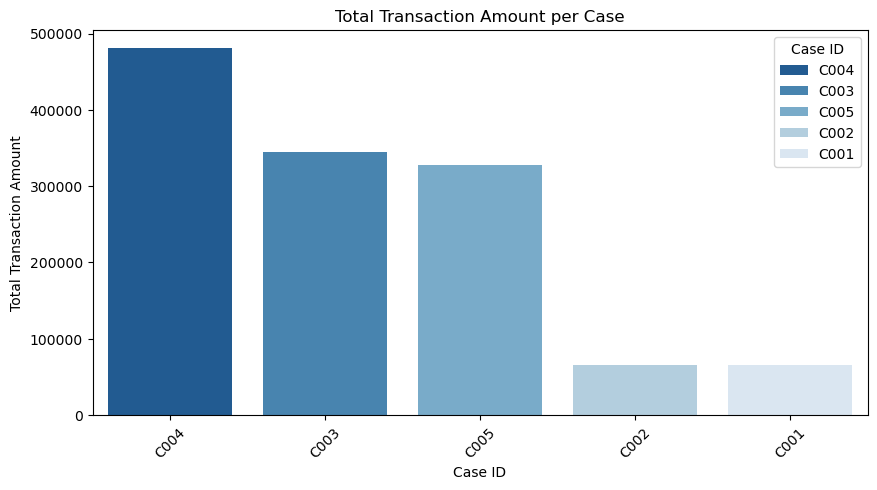

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort cases by total transaction amount
total_amounts_sorted = total_amounts.sort_values(by="Total Transaction Amount", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Case ID", y="Total Transaction Amount", data=total_amounts_sorted, hue = "Case ID", palette="Blues_r", legend=True)
plt.xticks(rotation=45)
plt.title("Total Transaction Amount per Case")
plt.xlabel("Case ID")
plt.ylabel("Total Transaction Amount")
plt.show()

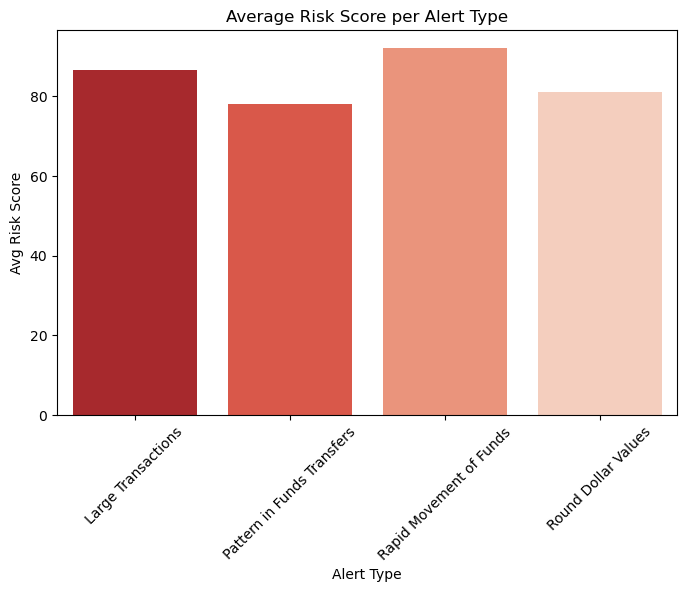

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Alert Type", y="Avg Risk Score", data=avg_risk_score, hue="Alert Type", palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Average Risk Score per Alert Type")
plt.xlabel("Alert Type")
plt.ylabel("Avg Risk Score")
plt.show()

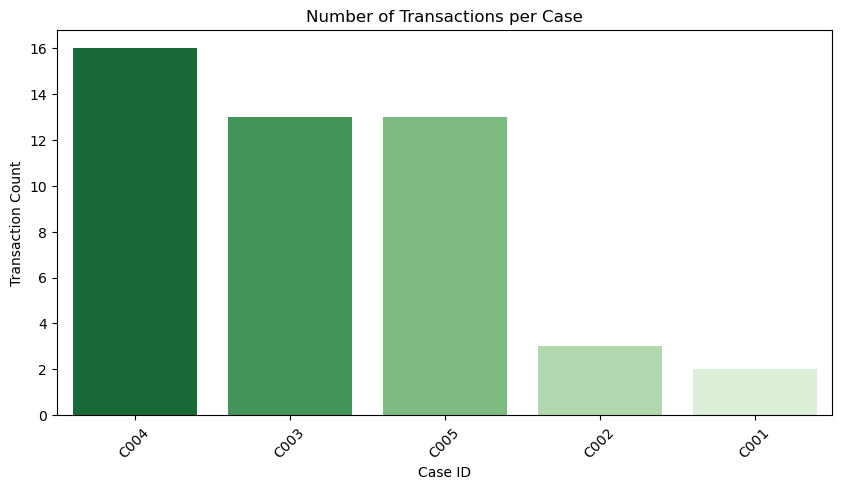

In [57]:
transaction_counts_sorted = transaction_counts.sort_values(by="Transaction Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Case ID", y="Transaction Count", data=transaction_counts_sorted, hue="Case ID", palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Number of Transactions per Case")
plt.xlabel("Case ID")
plt.ylabel("Transaction Count")
plt.show()

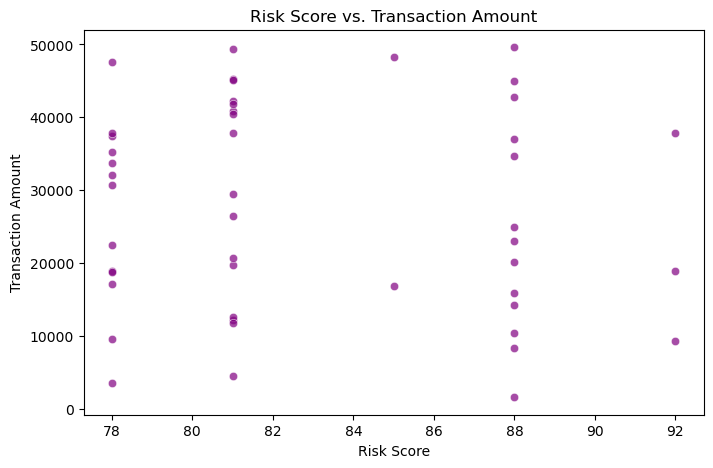

In [59]:
# Merge risk score with transaction amounts
merged_data = transactions_df.merge(case_alerts_df[["Case ID", "Risk Score"]], on="Case ID")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Risk Score", y="Amount", data=merged_data, alpha=0.7, color="purple")
plt.title("Risk Score vs. Transaction Amount")
plt.xlabel("Risk Score")
plt.ylabel("Transaction Amount")
plt.show()